In [10]:
%pylab inline
from sqlalchemy import create_engine
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
%matplotlib inline

def get_lookupTable(file,code='code',label='label'):
    lookupTable={}
    df_lookupTable =  pd.read_csv(file)
    for i in range(0, len(df_lookupTable)):
        lookupTable[df_lookupTable.iloc[i][code]]=df_lookupTable.iloc[i][label]
    return lookupTable

Populating the interactive namespace from numpy and matplotlib


## Data Pereprocessing

In [11]:
df_Vehicles0515=pd.read_csv('data/Vehicles0515.csv',usecols=[0,1,2,4,6,11,14,15,16]) # اخر عمود بسبب مشكله لهذا تم تحديد الاعمدة المطلوبة
df_Vehicles0515['Vehicle_Type'].replace(get_lookupTable('data/lookup/Vehicle_Type.csv'), inplace=True)
df_Vehicles0515

,Accident_Index,Vehicle_Reference,Vehicle_Type,Vehicle_Manoeuvre,Junction_Location,1st_Point_of_Impact,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver
0,200501BS00001,1,Car,18,0,1,2,74,10
1,200501BS00002,1,Bus or coach (17 or more pass seats),4,3,4,1,42,7
2,200501BS00003,1,Bus or coach (17 or more pass seats),17,0,4,1,35,6
3,200501BS00003,2,Car,2,0,3,1,62,9
4,200501BS00004,1,Car,18,0,1,2,49,8
5,200501BS00005,1,Motorcycle 125cc and under,18,0,1,1,49,8
6,200501BS00006,1,Car,5,0,0,1,51,8
7,200501BS00006,2,Motorcycle 125cc and under,18,0,0,2,30,6
8,200501BS00007,1,Motorcycle 125cc and under,18,1,1,1,31,6
9,200501BS00007,2,Car,2,1,2,1,41,7


In [12]:
df_Accidents  = pd.read_csv('data/Accidents0515.csv'  )
df_Severity= pd.read_csv('data/lookup/Accident_Severity.csv')
Severity_Type=df_Severity[['code','label']].set_index('code').to_dict()
df_Accidents['Severity_Type'] = df_Accidents['Accident_Severity'].map(Severity_Type['label'])
df_Accidents['Date2'] = pd.to_datetime(df_Accidents['Date'], format='%d/%m/%Y')


#df_Accidents['Police_Force'].replace(get_lookupTable('data/lookup/Police_Force.csv'), inplace=True)
#df_Accidents['Accident_Severity'].replace(get_lookupTable('data/lookup/Accident_Severity.csv'), inplace=True)
df_Accidents['Day_of_Week'].replace(get_lookupTable('data/lookup/Day_of_Week.csv'), inplace=True)


#df_Accidents['Local_Authority_(District)'].replace(get_lookupTable('data/lookup/Local_Authority_District.csv'), inplace=True)
#df_Accidents['Local_Authority_(Highway)'].replace(get_lookupTable('data/lookup/Local_Authority_Highway.csv','Code','Label'), inplace=True)
#df_Accidents['Road_Type'].replace(get_lookupTable('data/lookup/Road_Type.csv'), inplace=True)
#df_Accidents['Junction_Detail'].replace(get_lookupTable('data/lookup/Junction_Detail.csv'), inplace=True)
#df_Accidents['Junction_Control'].replace(get_lookupTable('data/lookup/Junction_Control.csv'), inplace=True)
#df_Accidents['2nd_Road_Class'].replace(get_lookupTable('data/lookup/Road_Class.csv'), inplace=True)
#df_Accidents['Light_Conditions'].replace(get_lookupTable('data/lookup/Light_Conditions.csv'), inplace=True)
#df_Accidents['Urban_or_Rural_Area'].replace(get_lookupTable('data/lookup/Urban_Rural.csv'), inplace=True)
#df_Accidents['Did_Police_Officer_Attend_Scene_of_Accident'].replace(get_lookupTable('data/lookup/Police_Officer_Attend.csv'), inplace=True)
#df_Accidents
#df_Accidents = df_Accidents[df_Accidents.Number_of_Casualties <5]
Vehicle_Type=df_Vehicles0515[['Accident_Index','Vehicle_Type']].set_index('Accident_Index').to_dict()
df_Accidents['Vehicle_Type'] = df_Accidents['Accident_Index'].map(Vehicle_Type['Vehicle_Type'])


df_Accidents


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Severity_Type,Date2,Vehicle_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,2,2,0,0,1,1,E01002849,Serious,2005-01-04,Car
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,1,1,0,0,1,1,E01002909,Slight,2005-01-05,Bus or coach (17 or more pass seats)
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,1,1,0,0,1,1,E01002857,Slight,2005-01-06,Car
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,1,1,0,0,1,1,E01002840,Slight,2005-01-07,Car
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,1,2,0,0,1,1,E01002863,Slight,2005-01-10,Motorcycle 125cc and under
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,2,2,6,0,1,1,E01002832,Slight,2005-01-11,Motorcycle 125cc and under
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,1,1,0,0,1,1,E01002875,Slight,2005-01-13,Car
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,1,1,0,0,1,1,E01002889,Slight,2005-01-14,Car
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,1,1,0,0,1,1,E01002900,Slight,2005-01-15,Car
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,1,1,0,0,1,1,E01002875,Slight,2005-01-15,Other vehicle


## EDA

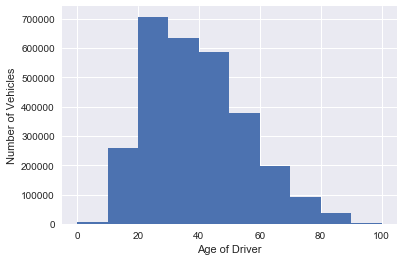

In [13]:
bin_edges= [0,10,20,30,40,50,60,70,80,90,100]
_=plt.hist(df_Vehicles0515['Age_of_Driver'], bins = bin_edges)
_=plt.xlabel('Age of Driver')
_=plt.ylabel('Number of Vehicles')
plt.show()

In [14]:
#df_Driver_Sex_Male= df_Vehicles0515[(df_Vehicles0515.Sex_of_Driver == 1)&((df_Vehicles0515.Age_of_Driver>=20)&(df_Vehicles0515.Age_of_Driver<51))]
df_Driver_Sex_Male= df_Vehicles0515[df_Vehicles0515.Sex_of_Driver == 1]
df_Driver_Sex_Female= df_Vehicles0515[df_Vehicles0515.Sex_of_Driver == 2]
Male_Accident=len(df_Driver_Sex_Male)
Female_Accident=len(df_Driver_Sex_Female)
total_Accident=len(df_Vehicles0515)
per_Male_Accident=(Male_Accident/total_Accident)*100
per_Female_Accident=(Female_Accident/total_Accident)*100
print('Male_Accident=',format(round(per_Male_Accident,1)),'%')
print('Female_Accident=',format(round(per_Female_Accident,1)),'%')

Male_Accident= 65.8 %
Female_Accident= 28.3 %


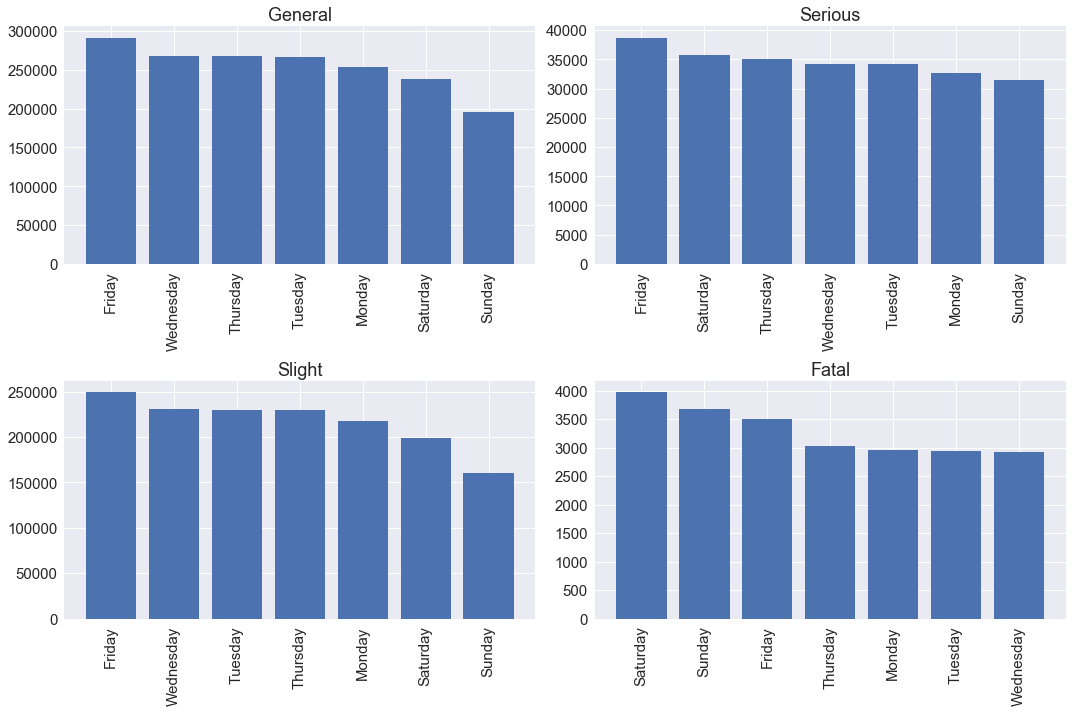

In [15]:
from collections import Counter
plt.figure(figsize=(15,10))
def histogram_label(df,i,Severity=-1):
    if Severity!=-1:
        df=df[df.Severity_Type==Severity]
    else:
        Severity='General'
    Day_of_Week = df.Day_of_Week
    Day_counts = Counter(Day_of_Week)

    common = Day_counts.most_common()
    labels = [item[0] for item in common]
    number = [item[1] for item in common]
    nbars = len(common)
    plt.subplot(2,2,i)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(Severity, fontsize=18)
    plt.bar(np.arange(nbars), number, tick_label=labels)
    
    
    
histogram_label(df_Accidents,1)   
histogram_label(df_Accidents,2,'Serious')
histogram_label(df_Accidents,3,'Slight')
histogram_label(df_Accidents,4,'Fatal')

plt.tight_layout()
plt.show()


Counter({'Car': 1238402, 'Pedal cycle': 145616, 'Van / Goods 3.5 tonnes mgw or under': 76262, 'Bus or coach (17 or more pass seats)': 63101, 'Motorcycle over 500cc': 58941, 'Motorcycle 125cc and under': 49933, 'Taxi/Private hire car': 34755, 'Goods 7.5 tonnes mgw and over': 32338, 'Motorcycle 50cc and under': 23860, 'Motorcycle over 125cc and up to 500cc': 17827, 'Other vehicle': 15144, 'Goods over 3.5t. and under 7.5t': 12441, 'Minibus (8 - 16 passenger seats)': 5177, 'Agricultural vehicle': 3905, 'Ridden horse': 1121, 'Mobility scooter': 535, 'Goods vehicle - unknown weight': 473, 'Motorcycle - unknown cc': 345, 'Data missing or out of range': 235, 'Tram': 222, 'Electric motorcycle': 20})


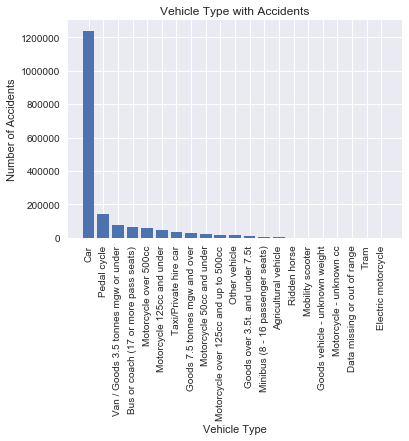

In [7]:
Vehicle_Type = df_Accidents.Vehicle_Type
Vehicle_counts = Counter(Vehicle_Type)
print(Vehicle_counts)
common = Vehicle_counts.most_common()
labels = [item[0] for item in common]
number = [item[1] for item in common]
nbars = len(common)
plt.xticks(rotation=90)
plt.title('Vehicle Type with Accidents')
_=plt.ylabel('Number of Accidents')
_=plt.xlabel('Vehicle Type')
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()
    


C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


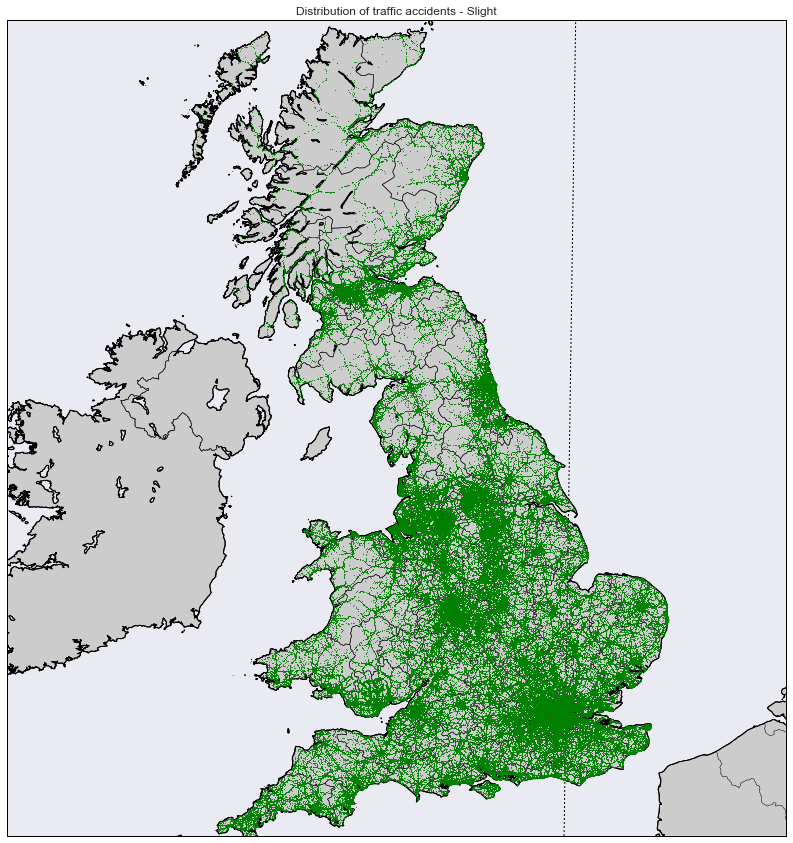

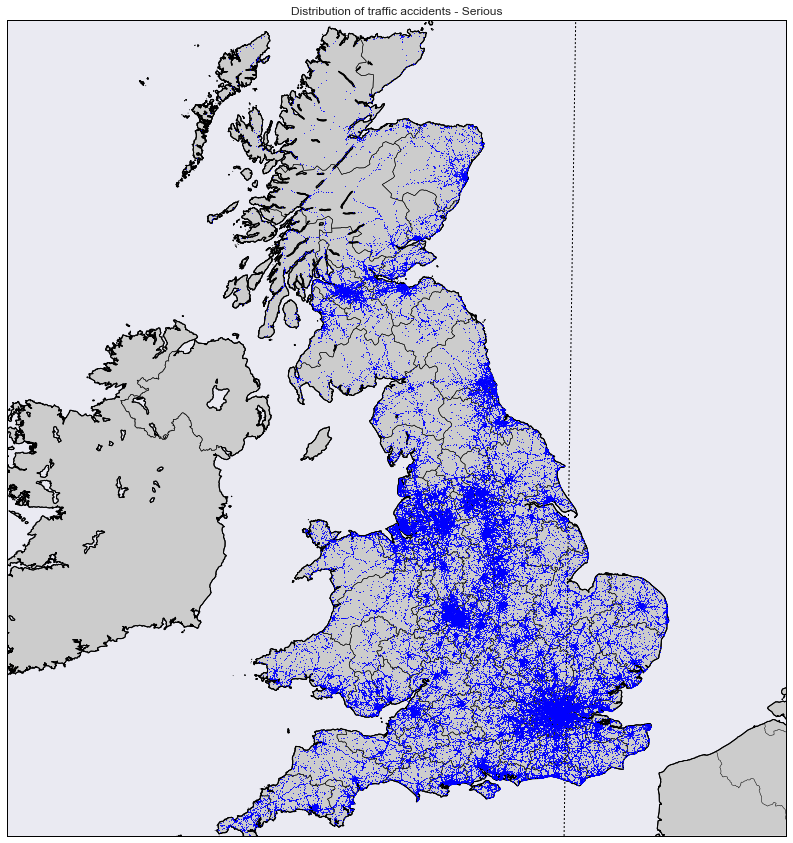

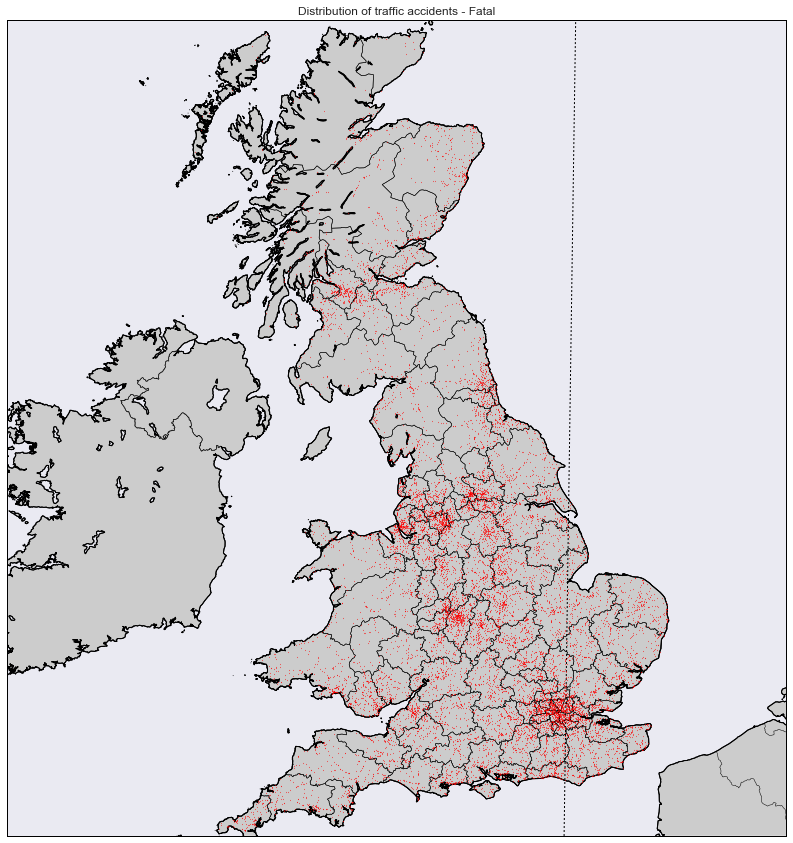

In [16]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
df_Accidents=df_Accidents[df_Accidents.Vehicle_Type=='Car']
#df_Accidents['datetime'] = pd.to_datetime(df_Accidents["Date"].map(str) +" " + df_Accidents["Time"])
df_Accidents_Fatal= df_Accidents[df_Accidents.Severity_Type=='Fatal']
df_Accidents_Serious= df_Accidents[df_Accidents.Severity_Type=='Serious']
df_Accidents_Slight= df_Accidents[df_Accidents.Severity_Type=='Slight']

def mapAccident_Severity(Severity,color) :
    df_Accidents_Severity=df_Accidents[df_Accidents.Severity_Type==Severity]
    plt.figure(figsize=(20,15)) 
    map = Basemap(projection='tmerc', lat_0=54, lon_0=1,
    resolution = 'h',  area_thresh = 0.1,
    llcrnrlon=-9.111745, llcrnrlat=49.761209,
    urcrnrlon=4.298973, urcrnrlat=58.797658)
 
    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(color='white')
    map.drawmapboundary()
 
    map.drawmeridians(np.arange(0, 360, 30))
    map.drawparallels(np.arange(-90, 90, 30))
    map.fillcontinents()
    map.drawcoastlines()
    map.drawcounties(zorder=0, color='white')
    map.readshapefile('data/postcode/Areas', 'areas')
    Longitudes= pd.np.array(df_Accidents_Severity.Longitude)
    Latitudes= pd.np.array(df_Accidents_Severity.Latitude)
    x,y = map(Longitudes, Latitudes)
    map.plot(x, y, color, markersize=1)
  
    plt.title('Distribution of traffic accidents - '+Severity)
    plt.show()


mapAccident_Severity('Slight','og') 
mapAccident_Severity('Serious','bo')   
mapAccident_Severity('Fatal','rd')


Counter({'Slight': 1080145, 'Serious': 144134, 'Fatal': 14123})
['Slight', 'Serious', 'Fatal']


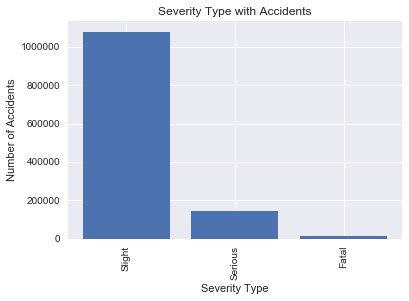

In [17]:
Severity_Type = df_Accidents.Severity_Type
Severity_counts = Counter(Severity_Type)
print(Severity_counts)
common = Severity_counts.most_common()
labels = [item[0] for item in common]
number = [item[1] for item in common]
print(labels)
nbars = len(common)
plt.xticks(rotation=90)
plt.title('Severity Type with Accidents')
_=plt.ylabel('Number of Accidents')
_=plt.xlabel('Severity Type')
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()

## Hypothesis Test:

In [18]:
Severity_Accidents_general_counts = Counter(df_Accidents.Vehicle_Type)
Severity_Accidents_Fatal_counts=Counter(df_Accidents_Fatal.Vehicle_Type)

per_car_Slight=(len(df_Accidents_Slight)/len(df_Accidents))*100
per_car_Serious=(len(df_Accidents_Serious)/len(df_Accidents))*100
per_car_fatal=(len(df_Accidents_Fatal)/len(df_Accidents))*100

print('The Total accidents cars=',len(df_Accidents))
print('The Total accidents cars Severity_Slight=',len(df_Accidents_Slight),'=',format(round(per_car_Slight,3)),'%')
print('The Total accidents cars Severity_Serious=',len(df_Accidents_Serious),'=',format(round(per_car_Serious,3)),'%')
print('The Total accidents cars Severity_Fatal=',len(df_Accidents_Fatal),'=',format(round(per_car_fatal,3)),'%')

The Total accidents cars= 1238402
The Total accidents cars Severity_Slight= 1080145 = 87.221 %
The Total accidents cars Severity_Serious= 144134 = 11.639 %
The Total accidents cars Severity_Fatal= 14123 = 1.14 %


Ho: percentage of fatal accidents > 1.14 <br>
Ha: percentage of fatal accidents <= 1.14

In [19]:
df_Accidents.loc[df_Accidents['Accident_Severity'] == 1, 'Accident_Severity'] ='1.14'
df_Accidents.loc[df_Accidents['Accident_Severity'] == 2, 'Accident_Severity'] ='11.639'
df_Accidents.loc[df_Accidents['Accident_Severity'] == 3, 'Accident_Severity'] ='87.221'
df_Accidents


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Severity_Type,Date2,Vehicle_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,11.639,1,1,04/01/2005,...,2,2,0,0,1,1,E01002849,Serious,2005-01-04,Car
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,87.221,2,1,06/01/2005,...,1,1,0,0,1,1,E01002857,Slight,2005-01-06,Car
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,87.221,1,1,07/01/2005,...,1,1,0,0,1,1,E01002840,Slight,2005-01-07,Car
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,87.221,2,1,13/01/2005,...,1,1,0,0,1,1,E01002875,Slight,2005-01-13,Car
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,87.221,1,2,14/01/2005,...,1,1,0,0,1,1,E01002889,Slight,2005-01-14,Car
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,87.221,2,2,15/01/2005,...,1,1,0,0,1,1,E01002900,Slight,2005-01-15,Car
10,200501BS00012,526240.0,178900.0,-0.182872,51.494902,1,87.221,1,1,16/01/2005,...,1,1,0,0,1,1,E01002835,Slight,2005-01-16,Car
12,200501BS00015,525590.0,178520.0,-0.192366,51.491632,1,87.221,1,1,11/01/2005,...,2,2,0,0,1,1,E01002849,Slight,2005-01-11,Car
13,200501BS00016,527990.0,178690.0,-0.157753,51.492622,1,87.221,2,1,18/01/2005,...,2,2,0,0,1,1,E01002902,Slight,2005-01-18,Car
16,200501BS00019,524680.0,179450.0,-0.205139,51.500191,1,11.639,2,1,20/01/2005,...,1,1,0,0,1,1,E01002864,Serious,2005-01-20,Car


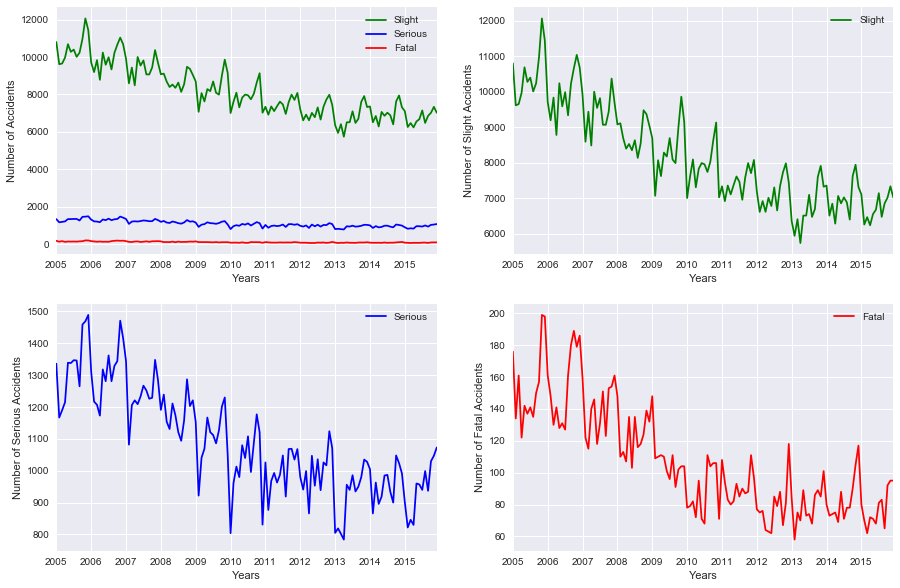

In [20]:

#Serious Slight
def AccidentsDates(Severity):
    df_Accidents_type_Severity= df_Accidents[df_Accidents.Severity_Type==Severity]
    pd.DatetimeIndex(df_Accidents_type_Severity.Date2).to_period("M")
    per = df_Accidents_type_Severity.Date2.dt.to_period("M")  # new way to get the same
    g = df_Accidents_type_Severity.groupby(per)
    g=g.count()
    g.rename(columns={'Date2': Severity}, inplace=True)
    df_Severity=pd.DataFrame(g[Severity])
    df_Severity['date'] = df_Severity.index.values
    return  df_Severity


df_Slight=AccidentsDates('Slight')
df_Serious=AccidentsDates('Serious')
df_Fatal=AccidentsDates('Fatal')

fig = plt.figure(figsize=(15,10))


ax1 = fig.add_subplot(221)
_=df_Slight.plot(color='Greens',ax=ax1)
_=df_Serious.plot(color='Blues',ax=ax1)
_=df_Fatal.plot(color='Reds',ax=ax1)

ax2 = fig.add_subplot(222)
df_Sl =df_Slight.plot(color='Greens',ax=ax2)

ax3 = fig.add_subplot(223)
df_Se =df_Serious.plot(color='Blues',ax=ax3)

ax4 = fig.add_subplot(224)
df_F =df_Fatal.plot(color='Reds',ax=ax4)
_.set_xlabel("Years")
_.set_ylabel("Number of Accidents")
df_Sl.set_xlabel("Years")
df_Sl.set_ylabel("Number of Slight Accidents")
df_Se.set_xlabel("Years")
df_Se.set_ylabel("Number of Serious Accidents")
df_F.set_xlabel("Years")
df_F.set_ylabel("Number of Fatal Accidents")





In [258]:
n=100000
sample_data_general = df_Accidents.sample(n)
sample_data_Fatal=sample_data_general[sample_data_general.Severity_Type=='Fatal']
sample_per_car_fatal=(len(sample_data_Fatal)/len(sample_data_general))*100
print('The Total accidents cars=',len(sample_data_general))
print('The Total accidents cars Severity_Fatal=',len(sample_data_Fatal))
print('The percentage of fatal accidents through cars=',format(round(sample_per_car_fatal,5)),'%')


The Total accidents cars= 100000
The Total accidents cars Severity_Fatal= 1160
The percentage of fatal accidents through cars= 1.16 %


In [259]:
print(format(round(sample_per_car_fatal-per_car_fatal,5)),'%')

0.01958 %


Counter({'Slight': 87173, 'Serious': 11667, 'Fatal': 1160})
['Slight', 'Serious', 'Fatal']


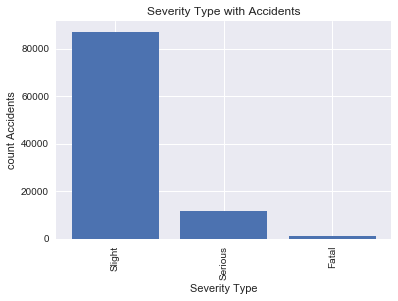

In [260]:
Severity_Type = sample_data_general.Severity_Type
Severity_counts = Counter(Severity_Type)
print(Severity_counts)
common_ = Severity_counts.most_common()
labels = [item[0] for item in common_]
number = [item[1] for item in common_]
print(labels)
nbars = len(common_)
plt.xticks(rotation=90)
plt.title('Severity Type with Accidents')
_=plt.ylabel('count Accidents')
_=plt.xlabel('Severity Type')
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()


# Population

In [261]:
mean=df_Accidents['Accident_Severity'].astype(float).mean()
print("Mean: ",mean,'\n')


std=df_Accidents['Accident_Severity'].astype(float).std()
print("Standard deviation: ",std,'\n')

Mean:  77.44254522494165 

Standard deviation:  25.56881383151318 



# Sample

In [262]:
print("Mean sample: \n")

mean_sample=sample_data_general['Accident_Severity'].astype(float).mean()
print(mean)
print("\nStandard deviation: \n")
std_sample=sample_data_general['Accident_Severity'].astype(float).std()
print(std)


Mean sample: 

77.44254522494165

Standard deviation: 

25.56881383151318


## Z-Test

In [263]:
z=(mean_sample-mean)/(std/np.sqrt(n))
z

-0.47290135761327773

In [264]:
from scipy import stats
p_value=stats.norm.cdf(z,0,1)*2
p_value

0.63628355632102773

p-value > 0.05 We reject Ho and accept our hypothesis

In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df_Accidents_ML  = pd.read_csv('data/Accidents0515.csv')
y = df_Accidents_ML.Accident_Severity

%matplotlib inline

In [345]:
X = df_Accidents_ML[['Day_of_Week',
       'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions','Carriageway_Hazards']]

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1335489, 8) (445164, 8) (1335489,) (445164,)


In [351]:
clf_1 = DecisionTreeClassifier().fit(X_train, y_train)
clf_2 = DecisionTreeClassifier().fit(X_test, y_test)
z1 = clf_1.predict(X_train)
z2 = clf_2.predict(X_test)
print(len(X_train), len(y_train), len(z1))
print(len(X_test), len(y_test), len(z2))



1335489 1335489 1335489
445164 445164 445164
[3 3 2 ..., 3 3 3]


In [361]:

X_train['target_actual'] = y_train
X_train['target_expected'] = z1
X_train



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Carriageway_Hazards,target_actual,target_expected
1364665,4,6,30,0,4,1,1,0,3,3
369502,1,6,30,6,1,1,1,0,3,3
1274739,6,6,30,3,1,1,1,0,2,2
606615,5,6,30,0,7,1,1,0,3,3
1161540,5,3,70,0,6,1,2,0,3,3
419333,6,3,70,0,1,1,1,0,3,3
1110581,3,6,30,0,4,2,2,0,3,3
1220141,4,6,30,0,1,1,1,0,3,3
1599857,2,1,40,1,1,2,2,0,3,3
1013572,6,6,30,1,1,2,2,0,3,3


In [349]:
X_test['target_actual'] = y_test
X_test['target_expected'] = z2
X_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Carriageway_Hazards,target_actual,target_expected
1681774,5,3,30,7,4,5,2,0,3,3
691926,6,6,30,3,1,1,1,0,3,3
128079,7,6,60,0,6,1,1,0,2,3
1591313,1,6,30,3,1,1,1,0,3,3
1206338,6,6,30,0,4,1,1,0,2,3
71778,5,6,30,0,1,1,1,0,3,3
1421484,1,1,60,1,1,1,1,0,2,3
21359,5,6,30,3,4,1,1,0,3,3
261032,7,6,30,0,1,1,1,0,3,3
810390,2,6,30,0,4,1,1,0,3,3


In [371]:
print(len(X_test))
X_test['result'] = np.where(X_test['target_actual'] == X_test['target_expected'] 
                     , 1, 0)
X_test 

445164


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Carriageway_Hazards,target_actual,target_expected,result
1681774,5,3,30,7,4,5,2,0,3,3,1
691926,6,6,30,3,1,1,1,0,3,3,1
128079,7,6,60,0,6,1,1,0,2,3,0
1591313,1,6,30,3,1,1,1,0,3,3,1
1206338,6,6,30,0,4,1,1,0,2,3,0
71778,5,6,30,0,1,1,1,0,3,3,1
1421484,1,1,60,1,1,1,1,0,2,3,0
21359,5,6,30,3,4,1,1,0,3,3,1
261032,7,6,30,0,1,1,1,0,3,3,1
810390,2,6,30,0,4,1,1,0,3,3,1


In [381]:
X_test.result.astype(int)
count_false=len(X_test[(X_test['result']==0)])
count_true=len(X_test[(X_test['result']==1)])
Size=len(X_test)
PerPreErr=(count_false/Size)*100
print('false=',count_false,'\ntrue=',count_true,'\nSize=',Size)
print('The Percentage of Predict Error=',format(round(PerPreErr,2)),'%')


false= 64493 
true= 380671 
Size= 445164
The Percentage of Predict Error= 14.49 %
